In [3]:
import tensorflow as tf
tf.__version__

'2.8.2'

#Prepare the Data

In [4]:
mnist = tf.keras.datasets.mnist
(x_train, y_train),(x_test, y_test) = mnist.load_data()

11501568/11490434 [==============================] - 0s 0us/step


In [5]:
print(x_train[0])

[[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   3  18  18  18 126 136
  175  26 166 255 247 127   0   0   0   0]
 [  0   0   0   0   0   0   0   0  30  36  94 154 170 253 253 253 253 253
  225 172 253 242 195  64   0   0   0   0]
 [  0   0   0   0   0   0   0  49 238 253 253 253 253 253 253 253 253 251
   93  82  82  56  39   0   0   0   0   0]
 [  0   0   0   0   0   0   0  18 219 253 253 253 253 253 198 18

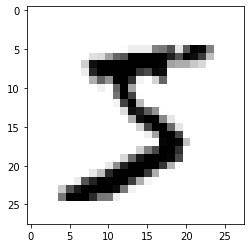

In [6]:
import matplotlib.pyplot as plt

plt.imshow(x_train[0],cmap=plt.cm.binary)
plt.show()

In [7]:
print(y_train[0])

5


#Normalize the Data

In [8]:
x_train = tf.keras.utils.normalize(x_train, axis=1)
x_test = tf.keras.utils.normalize(x_test, axis=1)

[[0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.    

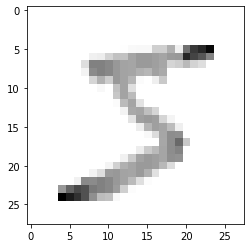

In [9]:
print(x_train[0])

plt.imshow(x_train[0],cmap=plt.cm.binary)
plt.show()

#Build the model

In [10]:
model = tf.keras.models.Sequential()

In [11]:
model.add(tf.keras.layers.Flatten())

In [12]:
model.add(tf.keras.layers.Dense(128, activation=tf.nn.relu))

In [13]:
model.add(tf.keras.layers.Dense(128, activation=tf.nn.relu))

In [14]:
model.add(tf.keras.layers.Dense(10, activation=tf.nn.softmax))

#Compile the model

In [15]:
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

#Train the model

In [16]:
model.fit(x_train, y_train, epochs=3)

Epoch 1/3
1875/1875 [==============================] - 7s 4ms/step - loss: 0.2633 - accuracy: 0.9230
Epoch 2/3
1875/1875 [==============================] - 6s 3ms/step - loss: 0.1071 - accuracy: 0.9668
Epoch 3/3
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0735 - accuracy: 0.9770


#Evaluate the model

In [17]:
val_loss, val_acc = model.evaluate(x_test, y_test)
print(val_loss)
print(val_acc)

313/313 [==============================] - 1s 2ms/step - loss: 0.0922 - accuracy: 0.9717
0.09218544512987137
0.9717000126838684


#Summarizing preparing model and training the model together:

In [18]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()   # 28x28 numbers of 0-9
x_train = tf.keras.utils.normalize(x_train, axis=1).reshape(x_train.shape[0], -1)
x_test = tf.keras.utils.normalize(x_test, axis=1).reshape(x_test.shape[0], -1)

model = tf.keras.models.Sequential()
#model.add(tf.keras.layers.Flatten())   #Flatten the images! Could be done with numpy reshape
model.add(tf.keras.layers.Dense(128, activation=tf.nn.relu, input_shape= x_train.shape[1:]))
model.add(tf.keras.layers.Dense(128, activation=tf.nn.relu))
model.add(tf.keras.layers.Dense(10, activation=tf.nn.softmax))   #10 because dataset is numbers from 0 - 9

In [19]:
import tensorflow as tf  # deep learning library. Tensors are just multi-dimensional arrays

mnist = tf.keras.datasets.mnist  # mnist is a dataset of 28x28 images of handwritten digits and their labels
(x_train, y_train),(x_test, y_test) = mnist.load_data()  # unpacks images to x_train/x_test and labels to y_train/y_test

x_train = tf.keras.utils.normalize(x_train, axis=1)  # scales data between 0 and 1
x_test = tf.keras.utils.normalize(x_test, axis=1)  # scales data between 0 and 1

model = tf.keras.models.Sequential()  # a basic feed-forward model
model.add(tf.keras.layers.Flatten())  # takes our 28x28 and makes it 1x784
model.add(tf.keras.layers.Dense(128, activation=tf.nn.relu))  # a simple fully-connected layer, 128 units, relu activation
model.add(tf.keras.layers.Dense(128, activation=tf.nn.relu))  # a simple fully-connected layer, 128 units, relu activation
model.add(tf.keras.layers.Dense(10, activation=tf.nn.softmax))  # our output layer. 10 units for 10 classes. Softmax for probability distribution

model.compile(optimizer='adam',  # Good default optimizer to start with
              loss='sparse_categorical_crossentropy',  # how will we calculate our "error." Neural network aims to minimize loss.
              metrics=['accuracy'])  # what to track

model.fit(x_train, y_train, epochs=3)  # train the model

val_loss, val_acc = model.evaluate(x_test, y_test)  # evaluate the out of sample data with model
print(val_loss)  # model's loss (error)
print(val_acc)  # model's accuracy

Epoch 1/3
1875/1875 [==============================] - 9s 4ms/step - loss: 0.2630 - accuracy: 0.9239
Epoch 2/3
1875/1875 [==============================] - 6s 3ms/step - loss: 0.1073 - accuracy: 0.9668
Epoch 3/3
313/313 [==============================] - 1s 2ms/step - loss: 0.0909 - accuracy: 0.9722
0.090931236743927
0.9721999764442444


#Save the model

In [20]:
model.save('epic_num_reader.model')

INFO:tensorflow:Assets written to: epic_num_reader.model/assets


#Test and prediction

In [21]:
new_model = tf.keras.models.load_model('epic_num_reader.model')

In [22]:
predictions = new_model.predict(x_test)

In [23]:
print(predictions)

[[4.9638010e-10 1.9179537e-07 2.6728023e-06 ... 9.9996769e-01
  1.8055067e-08 9.2875936e-08]
 [9.5020933e-09 4.6659708e-02 9.5331383e-01 ... 1.7566894e-08
  2.8820132e-08 2.1923804e-13]
 [5.6927956e-07 9.9951434e-01 5.7427114e-05 ... 1.8734888e-04
  1.4091216e-04 2.7096075e-06]
 ...
 [1.3393241e-09 5.0213497e-08 4.7186337e-08 ... 4.4858880e-06
  1.8918678e-06 1.4464544e-05]
 [1.1740659e-05 4.3275045e-06 2.3946120e-07 ... 5.4401112e-06
  2.3965279e-03 8.2868517e-08]
 [4.2999687e-08 2.1876470e-08 1.5080160e-07 ... 2.6104094e-10
  9.0424848e-08 5.7272942e-10]]


In [24]:
import numpy as np

print(np.argmax(predictions[0]))

7


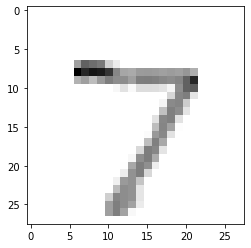

In [25]:
plt.imshow(x_test[0],cmap=plt.cm.binary)
plt.show()

#Conclusions:

We have got: 

0.090931236743927 (approx 9%) error

0.9721999764442444 (97%) accuracy

and our predicted number 7 matching the test number 7.

Good results ! 